**Анализ Times Higher Education World University Ranking**

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import math

plt.style.use('seaborn')
%matplotlib inline

**Загружаем файл timesData.csv**

In [469]:
path = '../timesData.csv'

In [470]:
timdata = pd.read_csv(path, sep=',')

**Редактирование данных**

In [471]:
timdata['num_students'] = timdata['num_students'].str.replace(',','')

In [472]:
timdata['international_students'] = timdata['international_students'].str.replace('%', '')

In [473]:
timdata['num_students'] = pd.to_numeric(timdata['num_students'], downcast='integer')

In [474]:
timdata = timdata.fillna(0)

In [475]:
timdata['international_students'] = pd.to_numeric(timdata['international_students'], downcast='integer')

In [476]:
timdata['international_students'] = timdata['international_students'].apply(lambda x: x/100)

In [477]:
timdata['international_students'] = timdata['international_students'] * timdata['num_students']

In [478]:
timdata['international_students'] = timdata['international_students'].apply(lambda x: math.ceil(x))

**Данные**

In [593]:
timdata.head(20)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,5038,0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,606,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,3655,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,3432,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,2141,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,6397,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,6773,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,5428,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,7681,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,2351,50 : 50,2011


**Рейтинги вузов по годам**

In [594]:
timdata2011 = timdata.query("year not in [2012, 2013, 2014, 2015, 2016]")
timdata2011

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,5038,0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,606,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,3655,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,3432,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,2141,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Kent State University,United States of America,33.5,15.9,33.3,76.8,26.3,46.5,23122.0,19.0,1850,58 : 42,2011
196,197,University of Illinois at Chicago,United States of America,57.8,51.8,46.8,34.7,-,46.4,24313.0,9.2,4134,53 : 47,2011
197,197,Zhejiang University,China,54.6,29.6,41.3,44.3,70.3,46.4,47508.0,15.9,2376,41 : 59,2011
198,199,Simon Fraser University,Canada,32.9,51.9,44.2,60.2,37.9,46.2,26640.0,28.3,5062,55 : 45,2011


In [481]:
timdata2012 = timdata.query("year not in [2011, 2013, 2014, 2015, 2016]")

In [482]:
timdata2013 = timdata.query("year not in [2012, 2011, 2014, 2015, 2016]")

In [483]:
timdata2014 = timdata.query("year not in [2012, 2013, 2011, 2015, 2016]")

In [484]:
timdata2015 = timdata.query("year not in [2012, 2013, 2014, 2011, 2016]")

In [485]:
timdata2016 = timdata.query("year not in [2012, 2013, 2014, 2015, 2011]")

**Топ 10 университетов в 2011 и в 2016 годах**

In [602]:
top10_2011 = timdata2011[:10]
top10_2011 = top10_2011.sort_values(['total_score'])
top10_2011

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,2351,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,7681,37 : 63,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,5428,50 : 50,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,6397,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,6773,46 : 54,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,2141,45 : 55,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,3432,42 : 58,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,3655,37 : 63,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,606,33 : 67,2011
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,5038,0,2011


In [603]:
top10_2016 = timdata2016[:10]
top10_2016 = top10_2016.sort_values(['total_score'])
top10_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14221.0,6.9,2987,42 : 58,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,6726,31 : 69,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,7681,37 : 63,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,2141,45 : 55,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,5038,0,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,3655,37 : 63,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,6397,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,3432,42 : 58,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,6773,46 : 54,2016
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,606,33 : 67,2016


**Лучшие университеты в 2011 году**

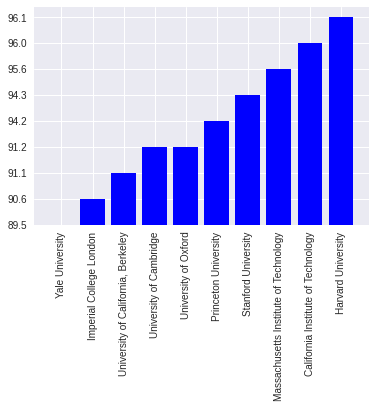

In [646]:
plt.bar(range(10), top10_2011['total_score'], color = 'blue')
plt.xticks(range(10), top10_2011['university_name'], rotation=90);

**Лучшие университеты в 2016 году**

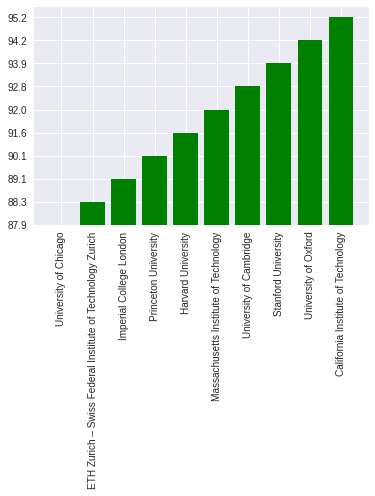

In [648]:
plt.bar(range(10), top10_2016['total_score'], color = 'green')
plt.xticks(range(10), top10_2016['university_name'], rotation=90);

**Как менялся рейтинг лучших университетов со временем**

In [595]:
timdata1 = timdata.loc[timdata['university_name'] == 'California Institute of Technology']
timdata1

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,606,33 : 67,2011
200,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,2243.0,6.9,606,33 : 67,2012
602,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,2243.0,6.9,606,33 : 67,2013
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,2243.0,6.9,606,33 : 67,2014
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,2243.0,6.9,606,33 : 67,2015
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,606,33 : 67,2016


In [596]:
timdata2 = timdata.loc[timdata['university_name'] == 'Harvard University']
timdata2

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,5038,0,2011
201,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,20152.0,8.9,5038,0,2012
605,4,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,20152.0,8.9,5038,0,2013
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,20152.0,8.9,5038,0,2014
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,20152.0,8.9,5038,0,2015
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,5038,0,2016


In [597]:
timdata3 = timdata.loc[timdata['university_name'] == 'Massachusetts Institute of Technology']
timdata3

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,3655,37 : 63,2011
206,7,Massachusetts Institute of Technology,United States of America,92.7,79.2,87.4,100.0,94.4,92.3,11074.0,9.0,3655,37 : 63,2012
606,5,Massachusetts Institute of Technology,United States of America,92.9,81.6,89.2,99.9,92.9,93.1,11074.0,9.0,3655,37 : 63,2013
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,11074.0,9.0,3655,37 : 63,2014
1407,6,Massachusetts Institute of Technology,United States of America,89.1,84.3,88.2,100.0,95.7,91.9,11074.0,9.0,3655,37 : 63,2015
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,3655,37 : 63,2016


In [598]:
timdata4 = timdata.loc[timdata['university_name'] == 'Stanford University']
timdata4

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,3432,42 : 58,2011
202,2,Stanford University,United States of America,94.8,57.2,98.9,99.8,63.8,93.9,15596.0,7.8,3432,42 : 58,2012
603,2,Stanford University,United States of America,95.0,56.6,98.8,99.3,62.4,93.7,15596.0,7.8,3432,42 : 58,2013
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,15596.0,7.8,3432,42 : 58,2014
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,15596.0,7.8,3432,42 : 58,2015
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,3432,42 : 58,2016


In [599]:
timdata5 = timdata.loc[timdata['university_name'] == 'University of Cambridge']
timdata5

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,6397,46 : 54,2011
205,6,University of Cambridge,United Kingdom,90.5,85.3,94.2,97.3,55.5,92.4,18812.0,11.8,6397,46 : 54,2012
608,7,University of Cambridge,United Kingdom,91.2,83.6,95.6,96.2,59.1,92.6,18812.0,11.8,6397,46 : 54,2013
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,18812.0,11.8,6397,46 : 54,2014
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,18812.0,11.8,6397,46 : 54,2015
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,6397,46 : 54,2016


In [600]:
timdata6 = timdata.loc[timdata['university_name'] == 'Imperial College London']
timdata6

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,7681,37 : 63,2011
207,8,Imperial College London,United Kingdom,88.8,92.2,88.7,93.9,93.1,90.7,15060.0,11.7,7681,37 : 63,2012
609,8,Imperial College London,United Kingdom,88.0,91.4,90.9,93.0,87.5,90.6,15060.0,11.7,7681,37 : 63,2013
1011,10,Imperial College London,United Kingdom,84.5,91.8,88.1,90.0,72.3,87.5,15060.0,11.7,7681,37 : 63,2014
1410,9,Imperial College London,United Kingdom,84.6,92.7,88.3,89.4,72.7,87.5,15060.0,11.7,7681,37 : 63,2015
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,7681,37 : 63,2016


In [601]:
timdata7 = timdata.loc[timdata['university_name'] == 'University of Oxford']
timdata7

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,6773,46 : 54,2011
203,4,University of Oxford,United Kingdom,89.5,91.9,96.6,97.9,62.1,93.6,19919.0,11.6,6773,46 : 54,2012
604,2,University of Oxford,United Kingdom,89.7,88.7,98.1,95.6,79.8,93.7,19919.0,11.6,6773,46 : 54,2013
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,19919.0,11.6,6773,46 : 54,2014
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,6773,46 : 54,2015
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,6773,46 : 54,2016


In [497]:
x = np.linspace(0, 0, 1000)
y1 = x

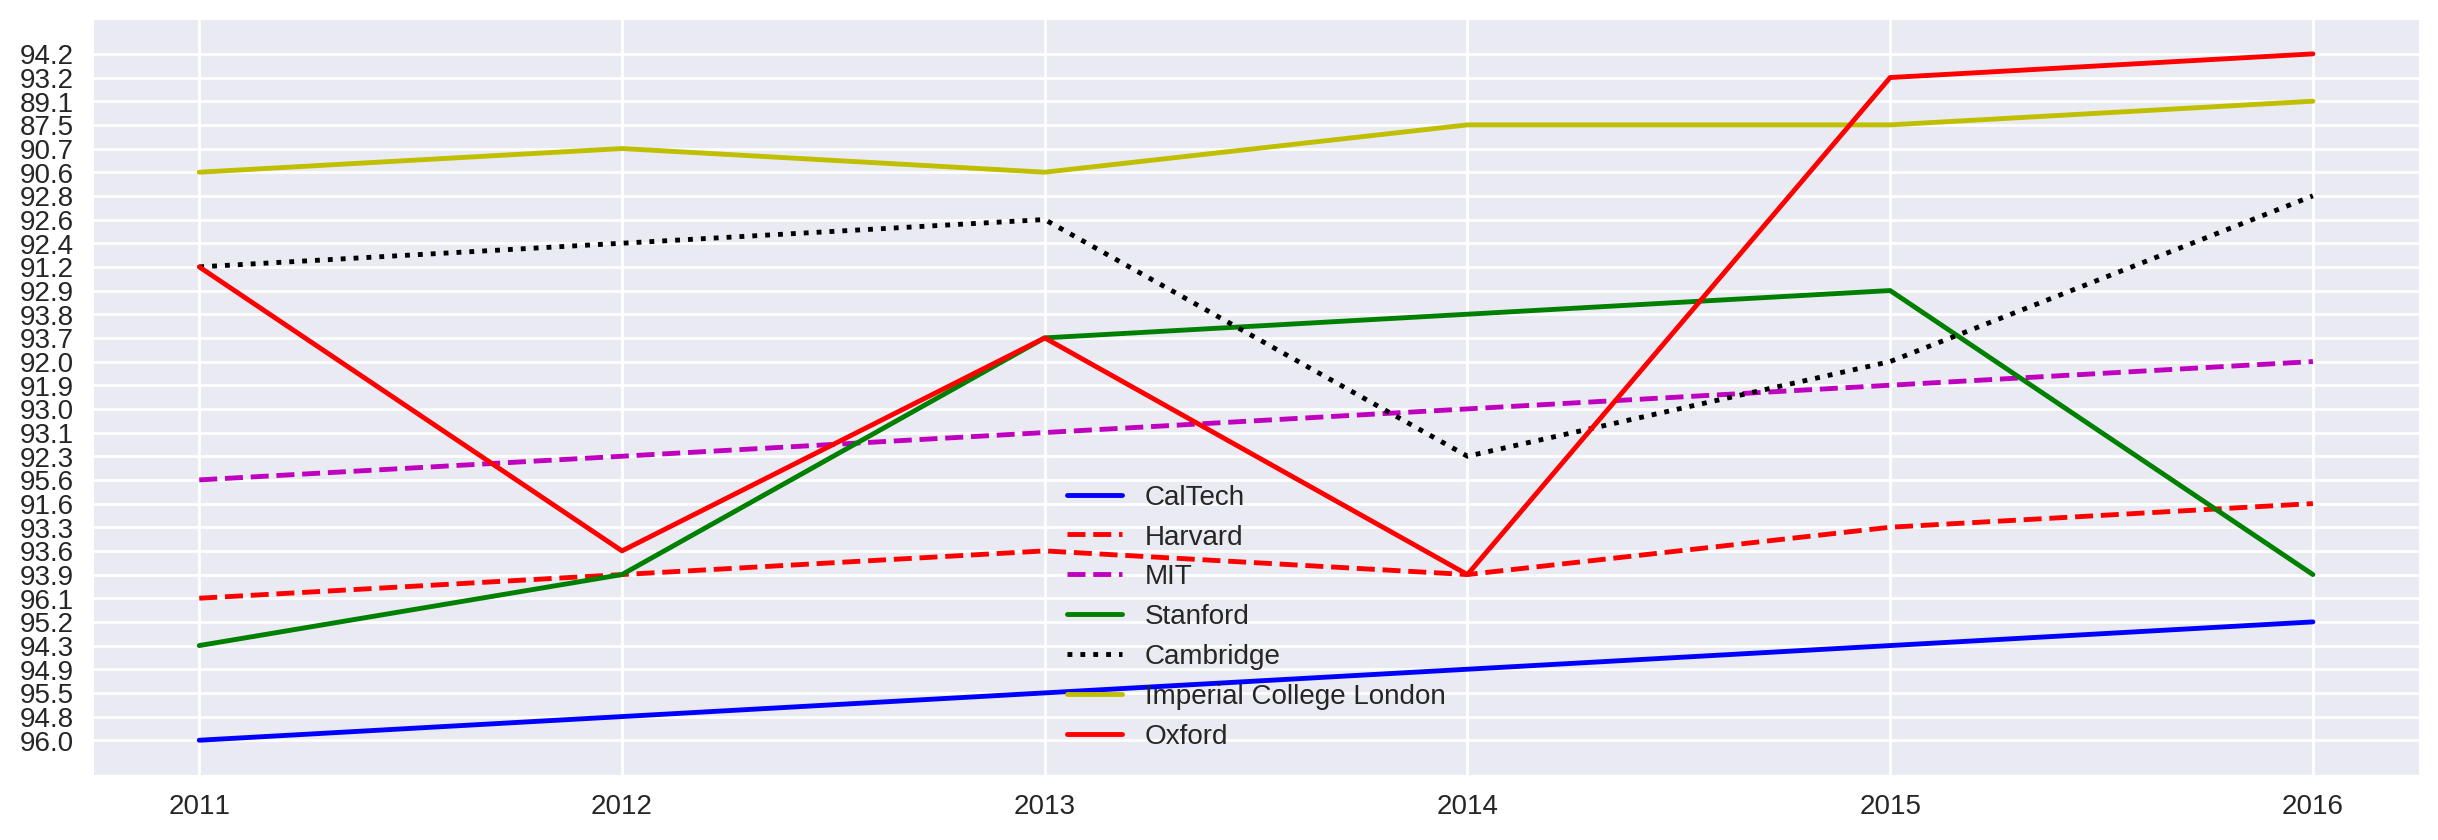

In [649]:
fig = plt.figure(figsize=(15, 5), dpi=200)
x = np.linspace(0, 10, 100)
#ax = plt.subplots()
x = timdata1['year']
plt.plot(x, timdata1['total_score'], '-b', label='CalTech')
plt.plot(x, timdata2['total_score'], '--r', label='Harvard')
plt.plot(x, timdata3['total_score'], '--m', label='MIT')
plt.plot(x, timdata4['total_score'], '-g', label='Stanford')
plt.plot(x, timdata5['total_score'], ':k', label='Cambridge')
plt.plot(x, timdata6['total_score'], '-y', label='Imperial College London')
plt.plot(x, timdata7['total_score'], '-r', label='Oxford')
plt.legend(loc='best');

**Диаграммы количества студентов и иностранных студентов в разных странах в 2011 и в 2016 гг**

In [585]:
st_country = timdata2011.groupby('country')[['num_students', 'international_students']].sum()
st_country = st_country.sort_values(['num_students'], ascending=False)
st_country.reset_index(inplace=True)
st_country = st_country.sort_values(by='num_students')
st_country

,country,num_students,international_students
25,Norway,11623.0,1395
24,South Africa,20040.0,3608
23,Finland,23505.0,1411
22,Turkey,25779.0,1805
21,New Zealand,29787.0,8341
20,France,34909.0,6536
19,Republic of Ireland,37714.0,8986
18,Austria,52860.0,15765
17,Singapore,56620.0,19002
16,Spain,58392.0,6168


**Количество всех студентов по странам**

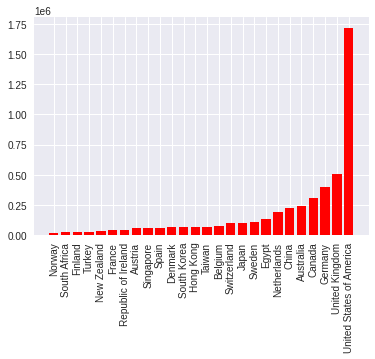

In [635]:
plt.bar(range(26), st_country['num_students'], color = 'red')
plt.xticks(range(26), st_country['country'], rotation=90);

**Количество иностранных студентов**

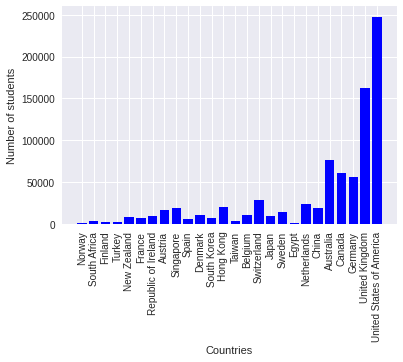

In [636]:
ax = plt.subplots()
plt.bar(range(26), st_country['international_students'], color = 'blue')
plt.xticks(range(26), st_country['country'], rotation=90);
plt.xlabel('Countries');
plt.ylabel('Number of students');


**Связь общего количества студентов и иностранных студентов в разных странах**

/home/elena/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


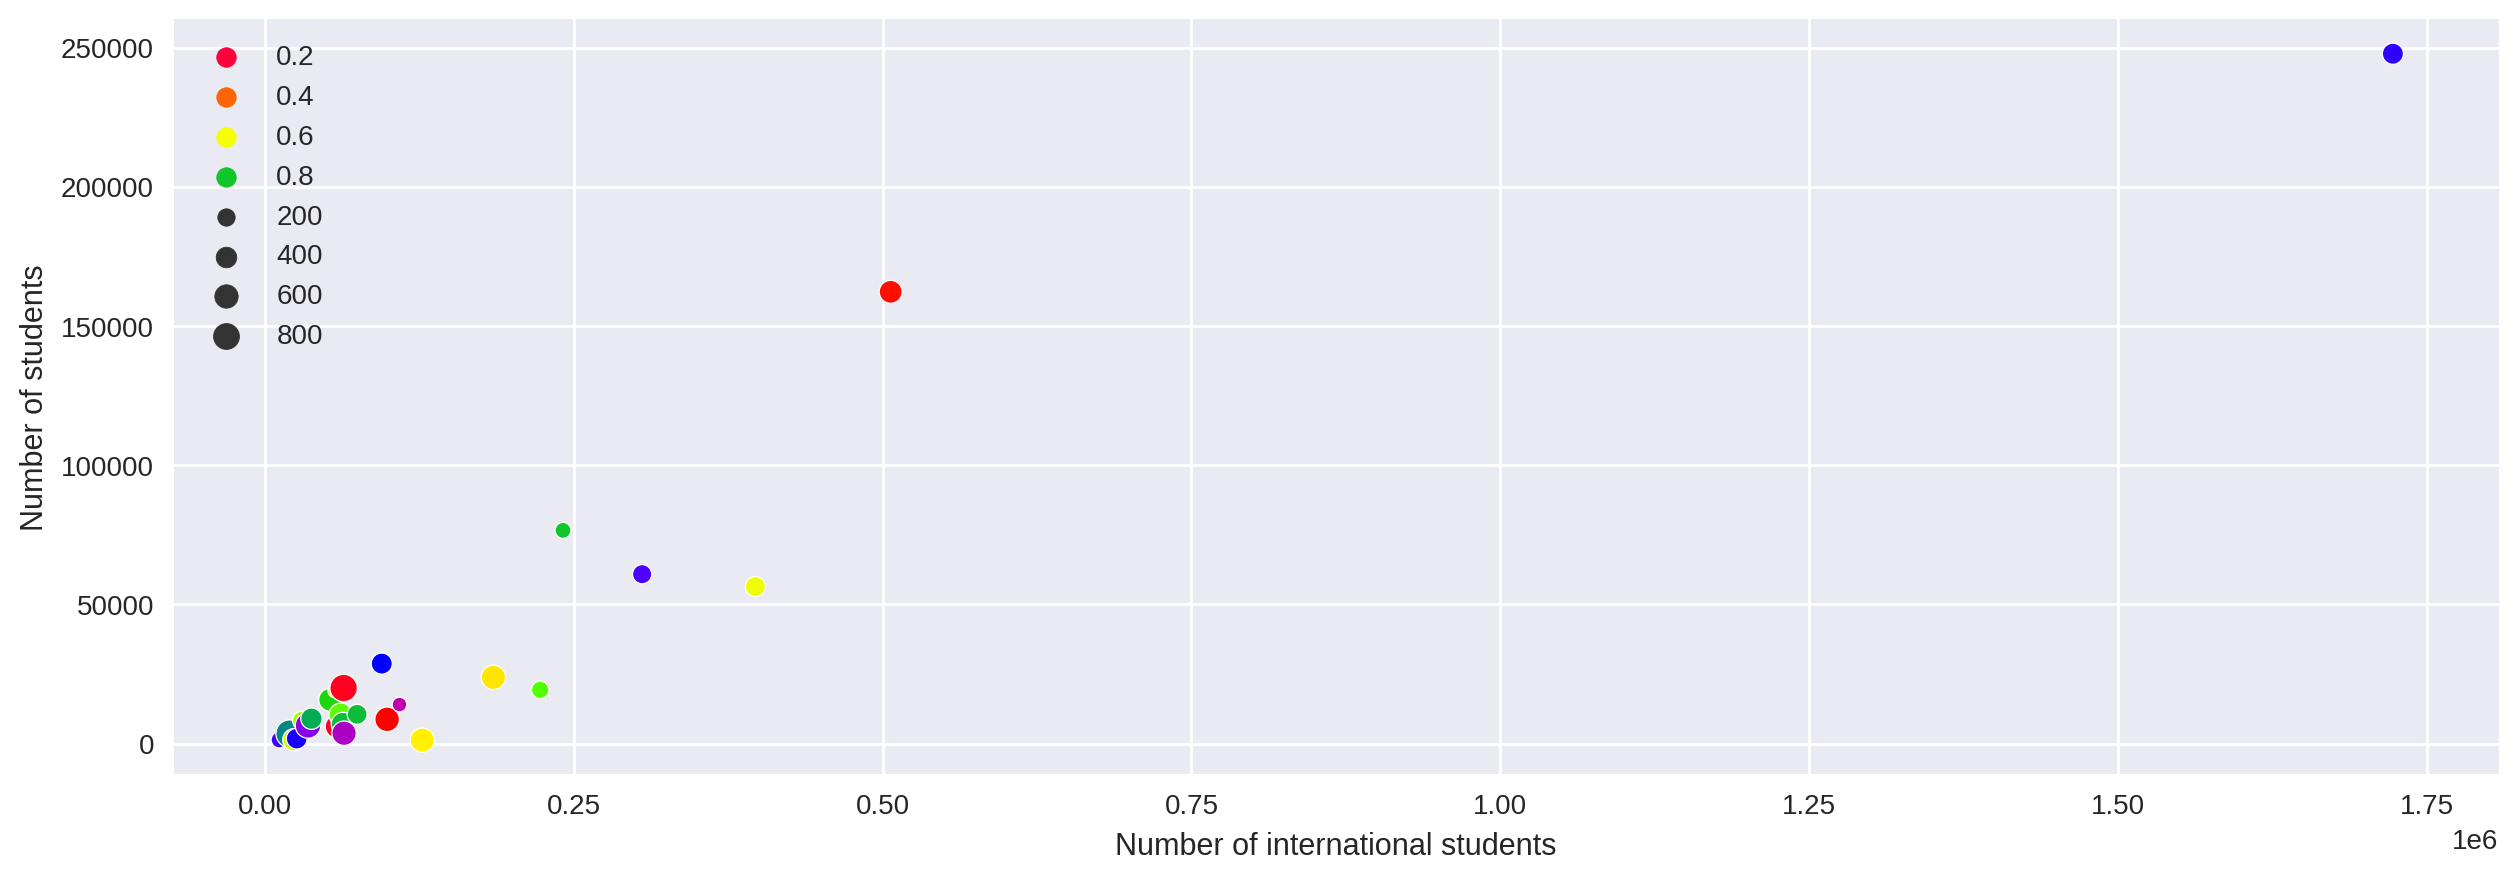

In [608]:
fig = plt.figure(figsize=(15, 5), dpi=200)
rng = np.random.RandomState(seed=0)
colors = rng.rand(26)
sizes = 1000 * rng.rand(26)
sns.scatterplot(st_country['num_students'], st_country['international_students'], hue = colors, size = sizes, palette='prism');
plt.xlabel('Number of international students');
plt.ylabel('Number of students');

**Связь количества студентов от позиции университета в рейтинге в 2011 году**

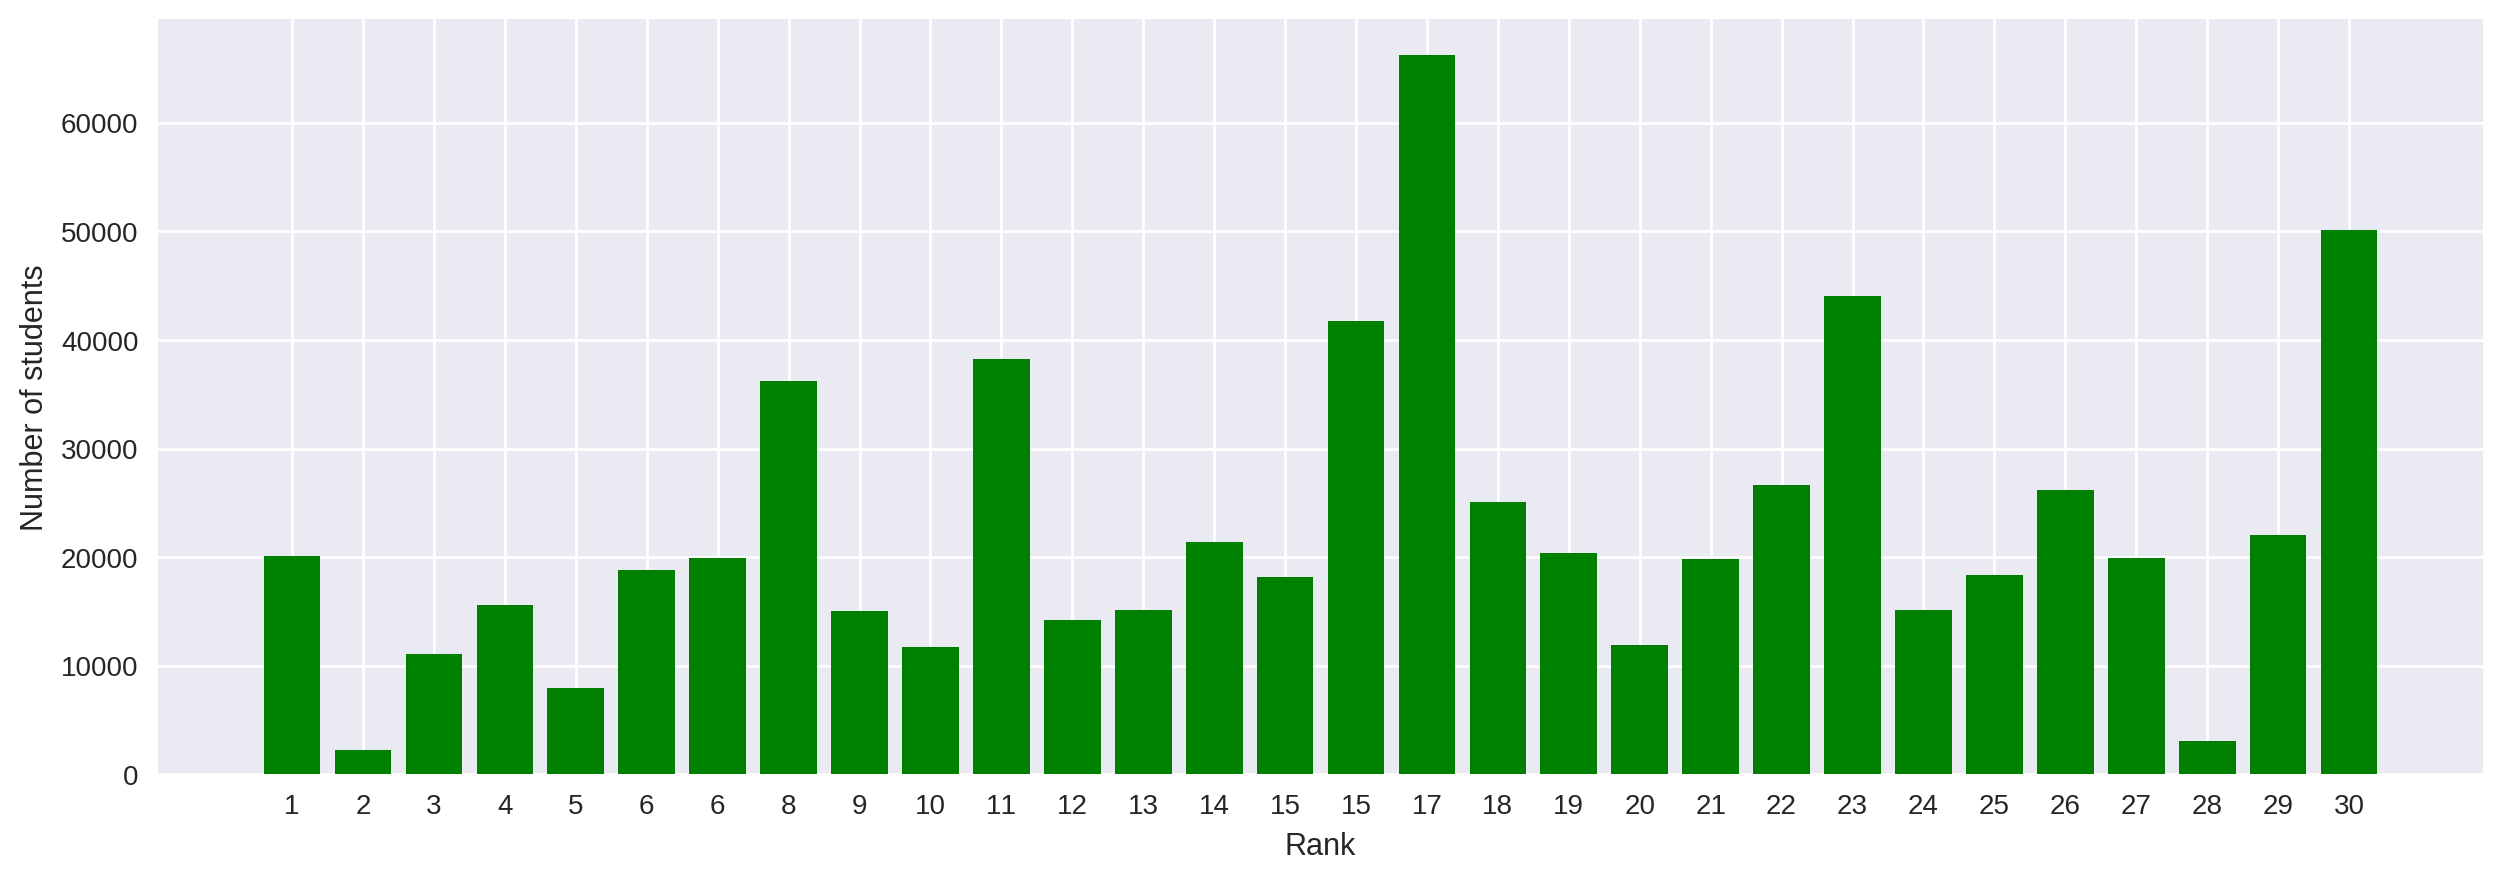

In [637]:
%matplotlib inline
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.bar(range(30), timdata2011['num_students'][:30], color = 'green');
plt.xticks(range(30), timdata2011['world_rank'][:30], rotation=0);
plt.xlabel('Rank');
plt.ylabel('Number of students');

**Связь количества студентов от позиции университета в рейтинге в 2016 году**

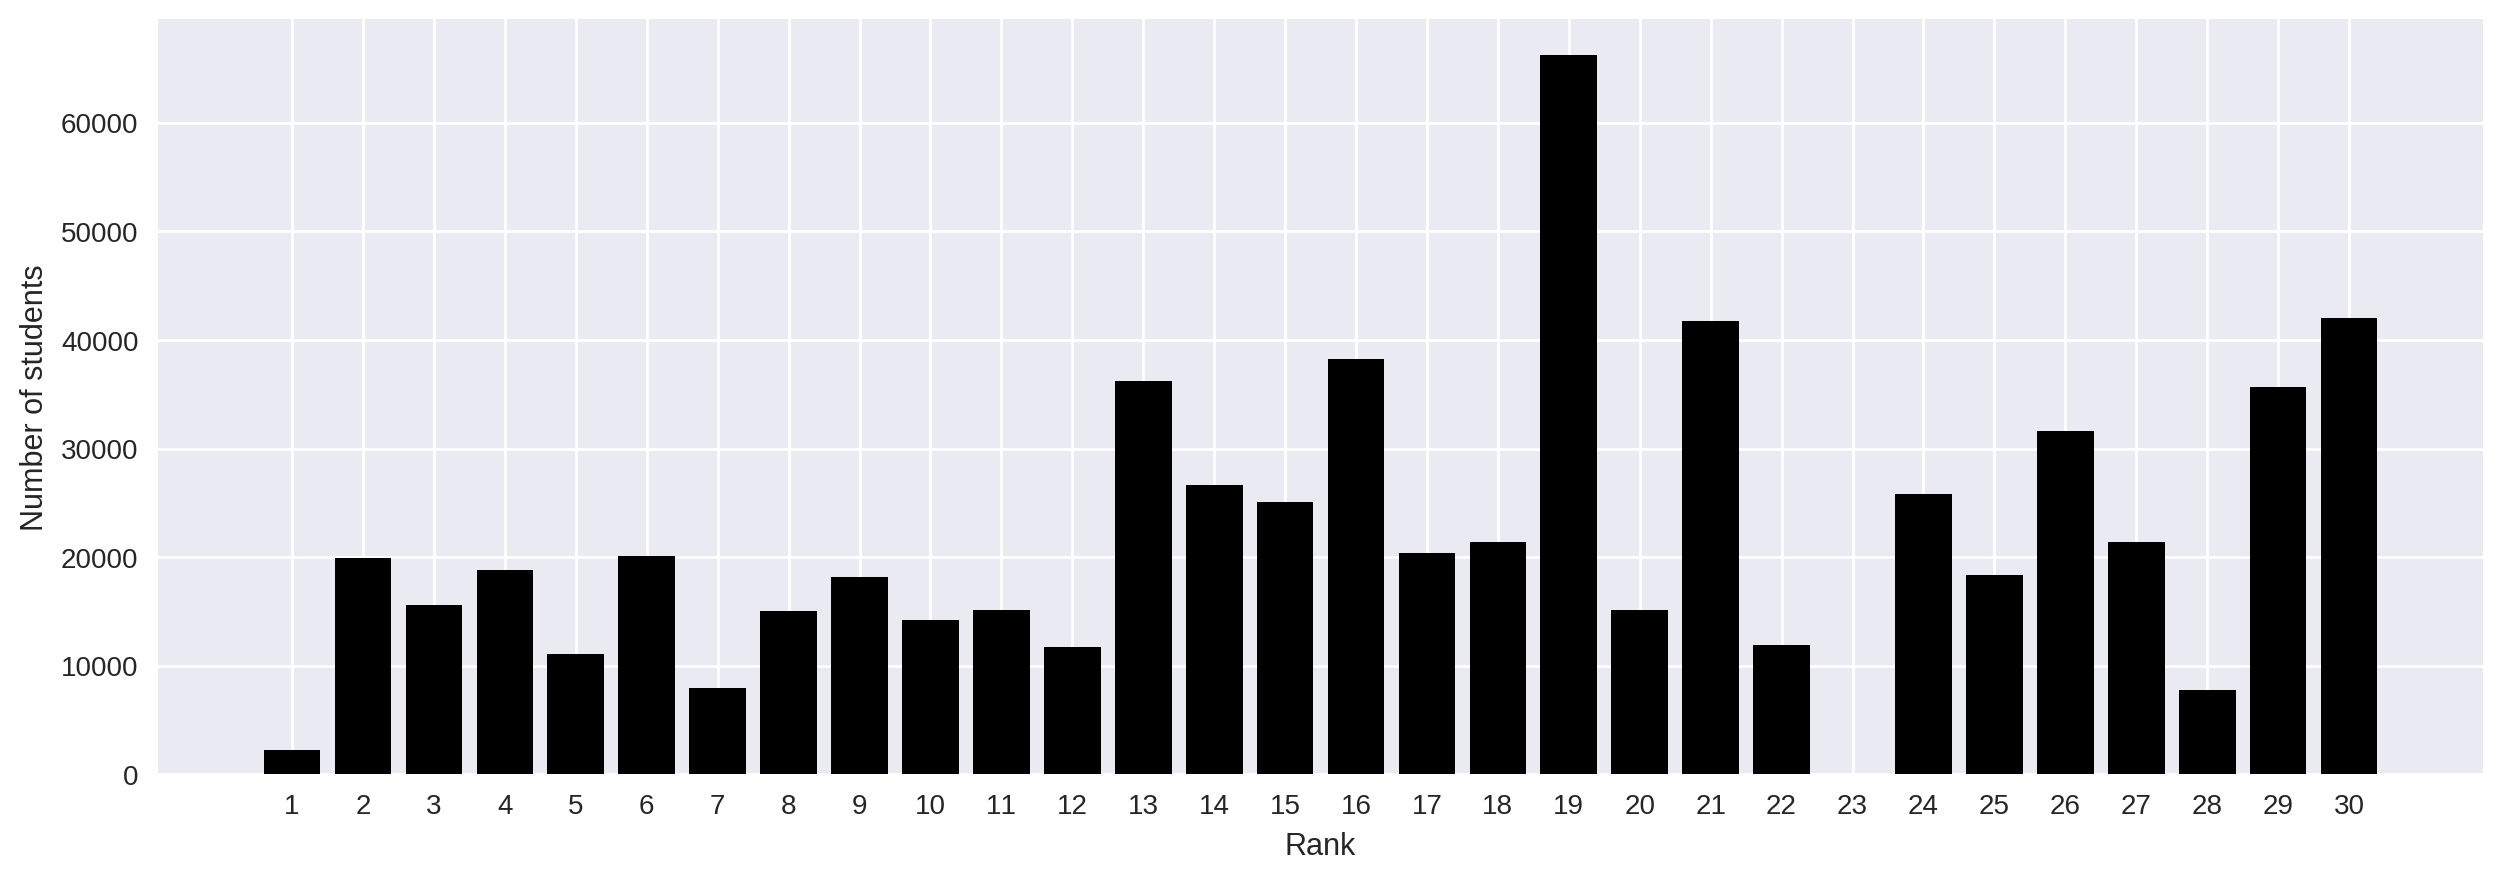

In [638]:
%matplotlib inline
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.bar(range(30), timdata2016['num_students'][:30], color = 'black');
plt.xticks(range(30), timdata2016['world_rank'][:30], rotation=0);
plt.xlabel('Rank');
plt.ylabel('Number of students');

**Связь количества иностранных студентов от позиции университета в рейтинге в 2011 году**

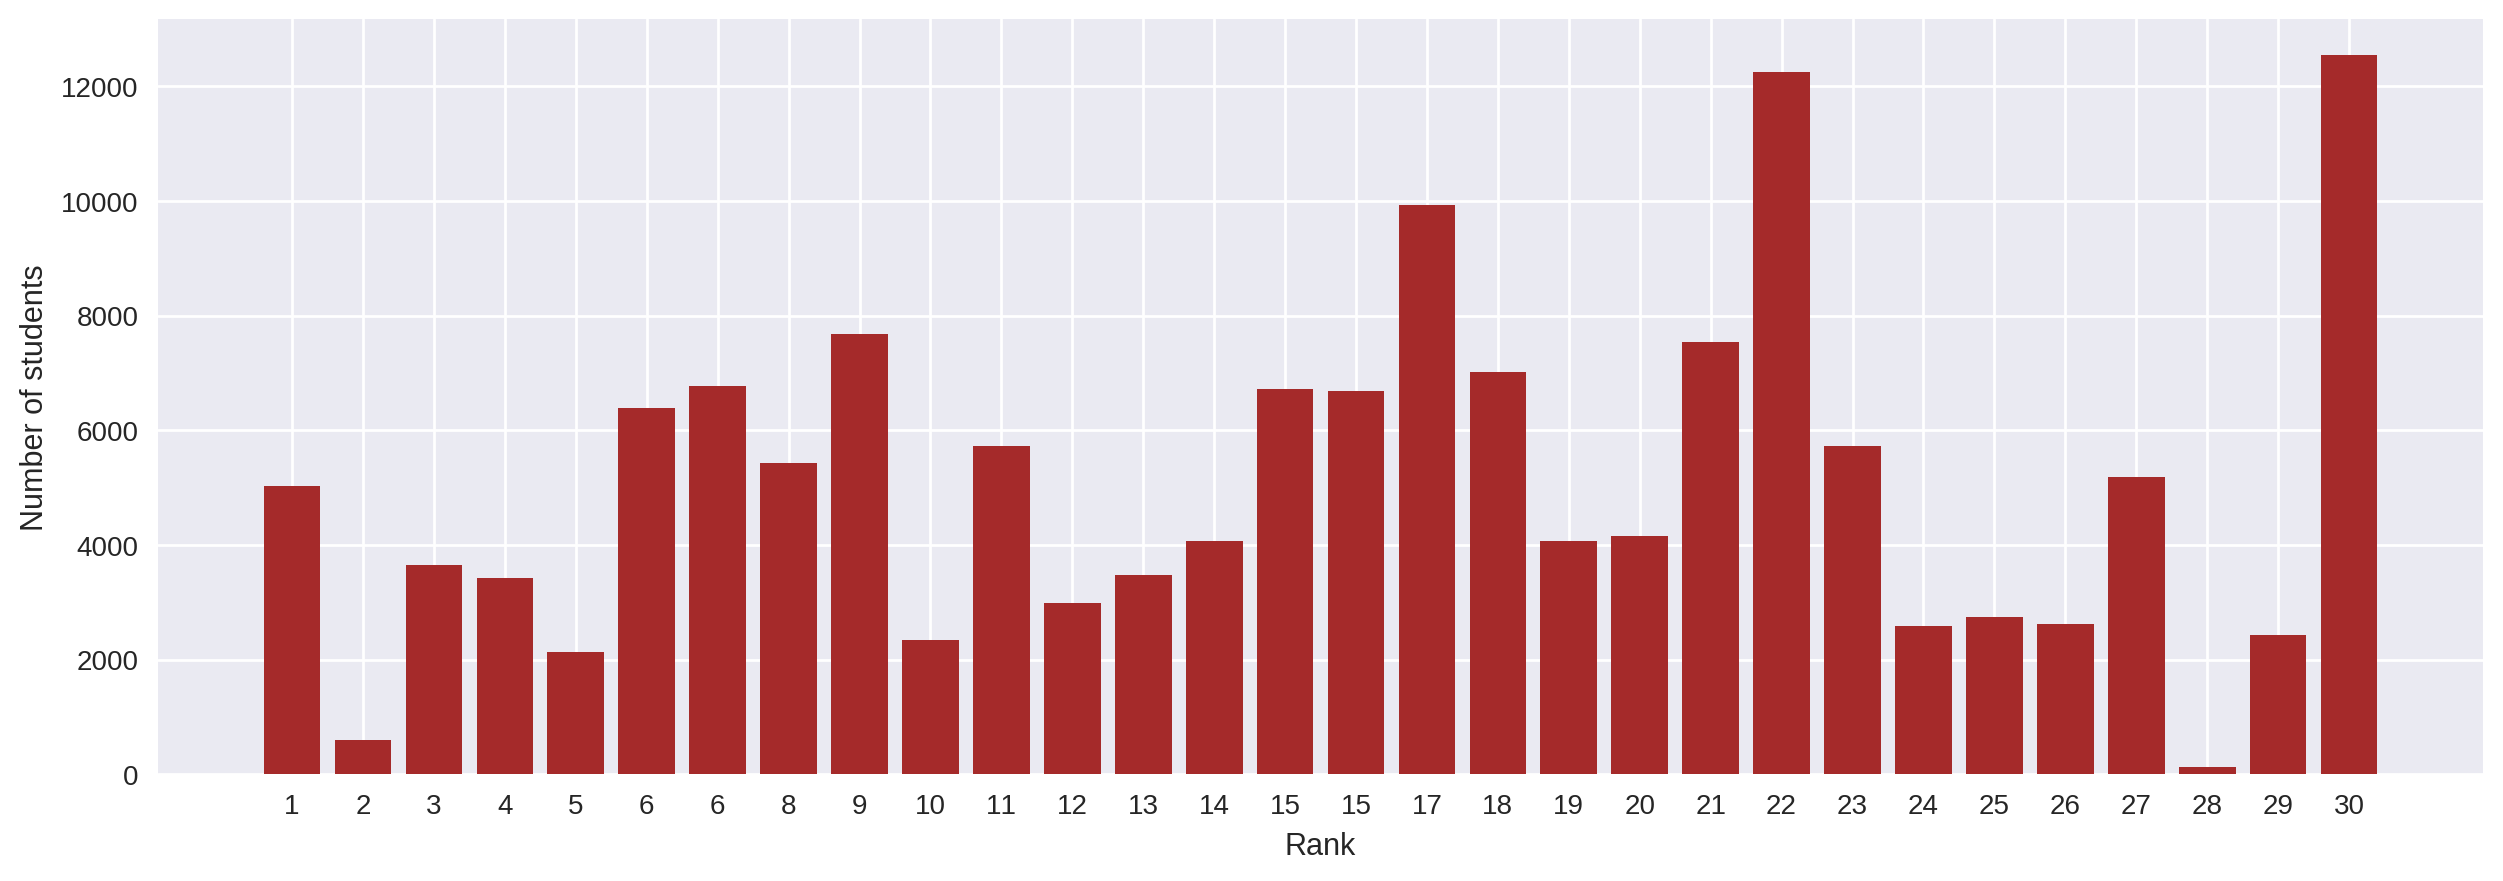

In [644]:
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.bar(range(30), timdata2011['international_students'][:30], color = 'brown');
plt.xticks(range(30), timdata2011['world_rank'][:30], rotation=0);
plt.xlabel('Rank');
plt.ylabel('Number of students');

**Связь количества иностранных студентов от позиции университета в рейтинге в 2016 году**

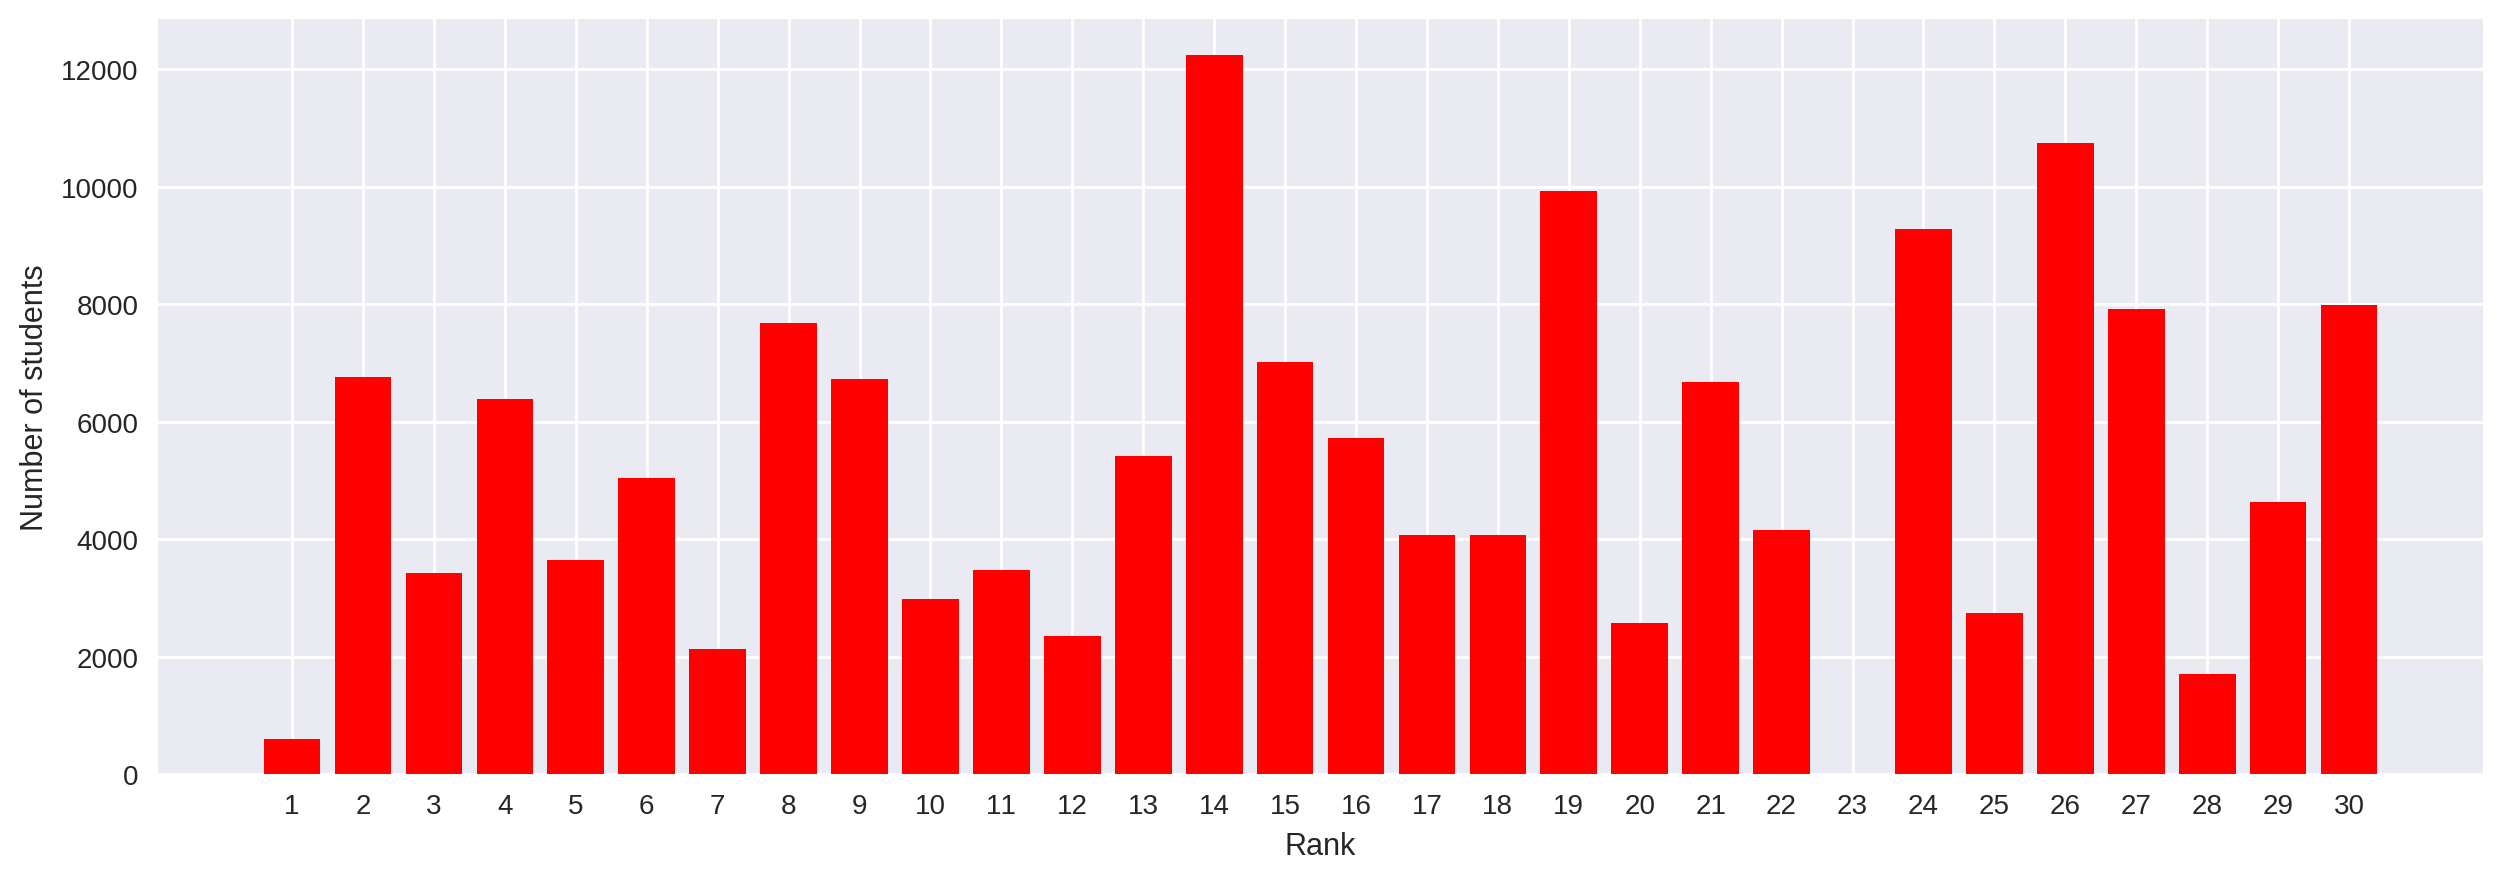

In [645]:
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.bar(range(30), timdata2016['international_students'][:30], color = 'red');
plt.xticks(range(30), timdata2016['world_rank'][:30], rotation=0);
plt.xlabel('Rank');
plt.ylabel('Number of students');